<a href="https://colab.research.google.com/github/blaewood/Python_DataMining/blob/main/DataMining_Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


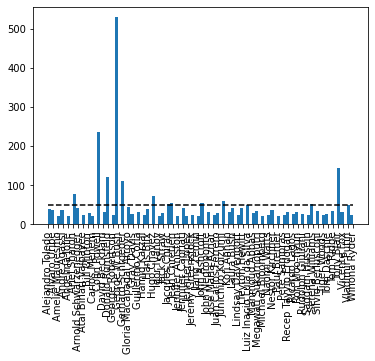

In [6]:
# load library

from sklearn.datasets import fetch_lfw_people

import numpy as np

import matplotlib

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, NMF

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import DBSCAN



# matplotlib 설정 

matplotlib.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7, color=False) # min_faces_per_person = 겹치지 않는 최소 얼굴 수, 

image_size = people.images[0].shape



# outlier 있는지 확인 

_, bins = np.histogram(people.target, bins=100)

plt.hist(people.target, bins=bins)

plt.xticks(range(len(people.target_names)), people.target_names, rotation=90, ha='center')

plt.hlines(50, xmin=0, xmax=bins[-1], linestyles='--')# 수평선

plt.show()

In [7]:
# 특성이 50개

idx = np.zeros(people.target.shape, dtype=np.bool)

for tg in np.unique(people.target):

    idx[np.where(people.target == tg)[0][:50]] = 1



# 데이터 분할

x_people = people.data[idx]

y_people = people.target[idx]



# 전처리

scaler_mms = MinMaxScaler()

x_people_scaled = scaler_mms.fit_transform(x_people)

# pca는 whiten 옵션을 True를 주면 전처리효과가 발생



# 훈련데이터를 PCA주성분 100개로 변환

pca = PCA(n_components=100, random_state=0, whiten=True).fit(x_people)

x_pca = pca.transform(x_people)



# 훈련데이터를 NMF 성분 100개로 변환

nmf = NMF(n_components=100, random_state=0).fit(x_people_scaled)

x_nmf = nmf.transform(x_people_scaled)



# DBSCAN에서 알맞은 min_sample값과 eps구하기

for min_sample in [3, 5, 7, 9]:

    for eps in [0.2, 0.4, 0.9, 1, 3, 5, 7, 9, 11, 13, 15, 17]:

        dbscan = DBSCAN(n_jobs=-1, min_samples=min_sample, eps=eps)

        labels_pca = dbscan.fit_predict(x_pca) # pca를 이용한 성분을 이용한 dbscan을 예측

        labels_nmf = dbscan.fit_predict(x_nmf) # nmf를 이용한 성분을 이용한 dbscan으로 예측

        print('︎=== min_sample:{}, eps:{} ==='.format(min_sample, eps))

        print('')

        print('pca ==> cluster 수: {}'.format(len(np.unique(labels_pca))))

        print('pca ==> cluster 크기: {}\n'.format(np.bincount(labels_pca+1)))



        print('nmf ==> cluster 수: {}'.format(len(np.unique(labels_nmf))))

        print('nmf ==> cluster 크기: {}'.format(np.bincount(labels_nmf+1)))

        print('---------------------------------------')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


︎=== min_sample:3, eps:0.2 ===

pca ==> cluster 수: 1
pca ==> cluster 크기: [2063]

nmf ==> cluster 수: 1
nmf ==> cluster 크기: [2063]
---------------------------------------
︎=== min_sample:3, eps:0.4 ===

pca ==> cluster 수: 1
pca ==> cluster 크기: [2063]

nmf ==> cluster 수: 1
nmf ==> cluster 크기: [2063]
---------------------------------------
︎=== min_sample:3, eps:0.9 ===

pca ==> cluster 수: 1
pca ==> cluster 크기: [2063]

nmf ==> cluster 수: 5
nmf ==> cluster 크기: [ 362 1692    3    3    3]
---------------------------------------
︎=== min_sample:3, eps:1 ===

pca ==> cluster 수: 1
pca ==> cluster 크기: [2063]

nmf ==> cluster 수: 2
nmf ==> cluster 크기: [ 144 1919]
---------------------------------------
︎=== min_sample:3, eps:3 ===

pca ==> cluster 수: 1
pca ==> cluster 크기: [2063]

nmf ==> cluster 수: 1
nmf ==> cluster 크기: [   0 2063]
---------------------------------------
︎=== min_sample:3, eps:5 ===

pca ==> cluster 수: 1
pca ==> cluster 크기: [2063]

nmf ==> cluster 수: 1
nmf ==> cluster 크기: [   0 206

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


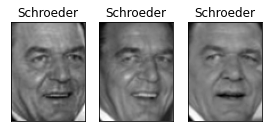

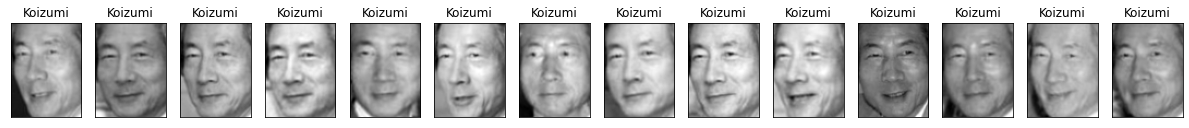

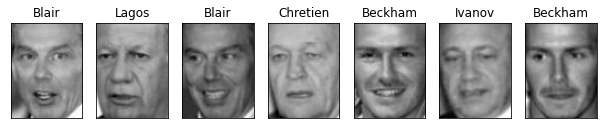

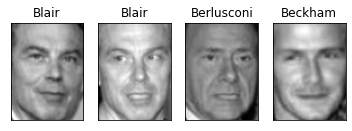

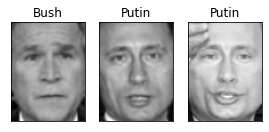

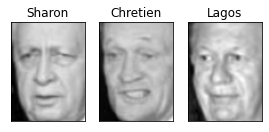

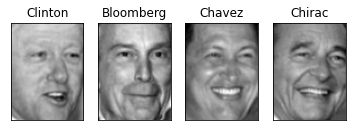

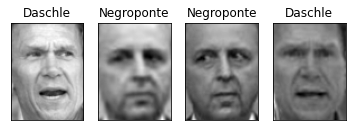

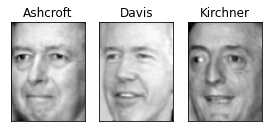

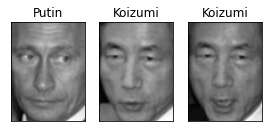

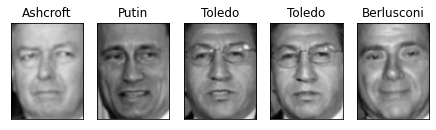

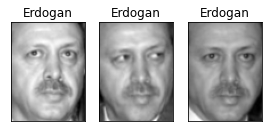

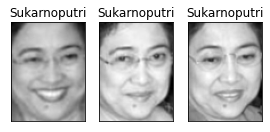

In [8]:
### pca : min_sample=3, eps=7일 때 가장 많은 클러스터가 생김

### nmf : min_sample=3, eps=0.9일 때 가장 많은 클러스터가 생김



# 가장 많은 클러스터가 생긴 eps와 n_sample 츨력

dbscan = DBSCAN(min_samples=3, eps=7, n_jobs=-1) # n_jobs = 코어의 갯수

labels_pca = dbscan.fit_predict(x_pca)



dbscan = DBSCAN(min_samples=3, eps=0.9, n_jobs=-1)

labels_nmf = dbscan.fit_predict(x_nmf)



# pca 주성분, DBSCAN 을 이용한 시각화

for cluster in range(labels_pca.max() + 1):

    idx = labels_pca == cluster 

    n_images = np.sum(idx) # idx중 true인 것의 갯수

    fig, axes = plt.subplots(1,n_images, figsize=(n_images*1.5, 4), # figsize=(a,b) axb 그림사이즈

                            subplot_kw={'xticks':(), 'yticks':()})

    

    for image, label, ax in zip(x_people[idx], y_people[idx], axes.ravel()):

        ax.imshow(image.reshape(image_size))

        ax.set_title(people.target_names[label].split()[-1])



plt.gray()

plt.show()